<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-equipo157/blob/main/Reto_Final_Equipo157_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
### Reto Final parte 2
### Noviembre 18, 2022
### Equipo 157
### - Juan Pablo Noguerón Morales A01097897
### - Mauricio Xavier Muñoz Escobar A01793598

In [112]:
#Librerías para manejo del archivo
import requests, zipfile as zf
from io import BytesIO

#Librerias para manipulación de datos
import pandas as pd
import numpy as np

#Librerías para graficado
import matplotlib.pyplot as plt 
import seaborn as sns

## 0.1.- Lectura de la base

In [113]:
#Descargamos y extracción de datos
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile = zf.ZipFile(BytesIO(req.content))
zipfile.extractall('/content')

In [114]:
#Lectura del archivo
df = pd.read_csv("/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", 
                 sep=",", 
                 encoding = "ISO-8859-1"
  )

df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


## 0.2.- Limpieza de la base

In [115]:
# Declaramos un arreglo que contendrá las columnas que iremos dropeando
columnas_drop = []
columnas_drop.append('CLAVE')
columnas_drop.append('SITIO')
columnas_drop.append('ORGANISMO_DE_CUENCA')
columnas_drop.append('ESTADO')
columnas_drop.append('MUNICIPIO')
columnas_drop.append('ACUIFERO')

In [116]:
columns = ['ALC_mg/L', 'CALIDAD_ALC', 'CUMPLE_CON_ALC']
columns_CAT = ['CALIDAD_ALC_CAT', 'CUMPLE_CON_ALC_CAT']

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [117]:
columns = ['CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'CUMPLE_CON_COND']
columns_CAT = ['CALIDAD_CONDUC_CAT', 'CUMPLE_CON_COND_CAT']

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [118]:
columns = ['SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']
columns_CAT = ['CALIDAD_SDT_ra_CAT', 'CALIDAD_SDT_salin_CAT', 'CUMPLE_CON_SDT_ra_CAT', 'CUMPLE_CON_SDT_salin_CAT']

df['SDT_M_mg/L'].replace('<', '', inplace = True, regex = True)
df['SDT_M_mg/L'] = df['SDT_M_mg/L'].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0],
      columns[3] : df[columns[3]].mode()[0], 
      columns[4] : df[columns[4]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [119]:
columns = ['FLUORUROS_mg/L', 'CALIDAD_FLUO', 'CUMPLE_CON_FLUO']
columns_CAT = ['CALIDAD_FLUO_CAT', 'CUMPLE_CON_FLUO_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [120]:
columns = ['DUR_mg/L', 'CALIDAD_DUR', 'CUMPLE_CON_DUR']
columns_CAT = ['CALIDAD_DUR_CAT', 'CUMPLE_CON_DUR_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [121]:
columns = ['COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'CUMPLE_CON_CF']
columns_CAT = ['CALIDAD_COLI_FEC_CAT', 'CUMPLE_CON_CF_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [122]:
columns = ['N_NO3_mg/L', 'CALIDAD_N_NO3', 'CUMPLE_CON_NO3']
columns_CAT = ['CALIDAD_N_NO3_CAT', 'CUMPLE_CON_NO3_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [123]:
columns = ['AS_TOT_mg/L', 'CALIDAD_AS', 'CUMPLE_CON_AS']
columns_CAT = ['CALIDAD_AS_CAT', 'CUMPLE_CON_AS_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [124]:
columns = ['CD_TOT_mg/L', 'CALIDAD_CD', 'CUMPLE_CON_CD']
columns_CAT = ['CALIDAD_CD_CAT', 'CUMPLE_CON_CD_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [125]:
columns = ['CR_TOT_mg/L', 'CALIDAD_CR', 'CUMPLE_CON_CR']
columns_CAT = ['CALIDAD_CR_CAT', 'CUMPLE_CON_CR_CAT']

# tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [126]:
columns = ['HG_TOT_mg/L', 'CALIDAD_HG', 'CUMPLE_CON_HG']
columns_CAT = ['CALIDAD_HG_CAT', 'CUMPLE_CON_HG_CAT']

#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [127]:
columns = ['PB_TOT_mg/L', 'CALIDAD_PB', 'CUMPLE_CON_PB']
columns_CAT = ['CALIDAD_PB_CAT', 'CUMPLE_CON_PB_CAT']

# tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [128]:
columns = ['MN_TOT_mg/L', 'CALIDAD_MN', 'CUMPLE_CON_MN']
columns_CAT = ['CALIDAD_MN_CAT', 'CUMPLE_CON_MN_CAT']

# tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

In [129]:
columns = ['FE_TOT_mg/L', 'CALIDAD_FE', 'CUMPLE_CON_FE']
columns_CAT = ['CALIDAD_FE_CAT', 'CUMPLE_CON_FE_CAT']

# tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex = True)
df[columns[0]] = df[columns[0]].astype('float64')

values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

df.fillna(value = values, inplace = True)

## 1.- Selecciona tus variables independientes X y dependiente Y (semáforo)

In [130]:
X = df[['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L']]
y = df[['SEMAFORO']]

## 2.- Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [131]:
y.value_counts()

SEMAFORO
Verde       434
Rojo        387
Amarillo    247
dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder

labelEnconder = LabelEncoder()
y['SEMAFORO'] = labelEnconder.fit_transform(y['SEMAFORO'])

y.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


SEMAFORO
2           434
1           387
0           247
dtype: int64

## 3.- Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 10, random_state = 1234)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

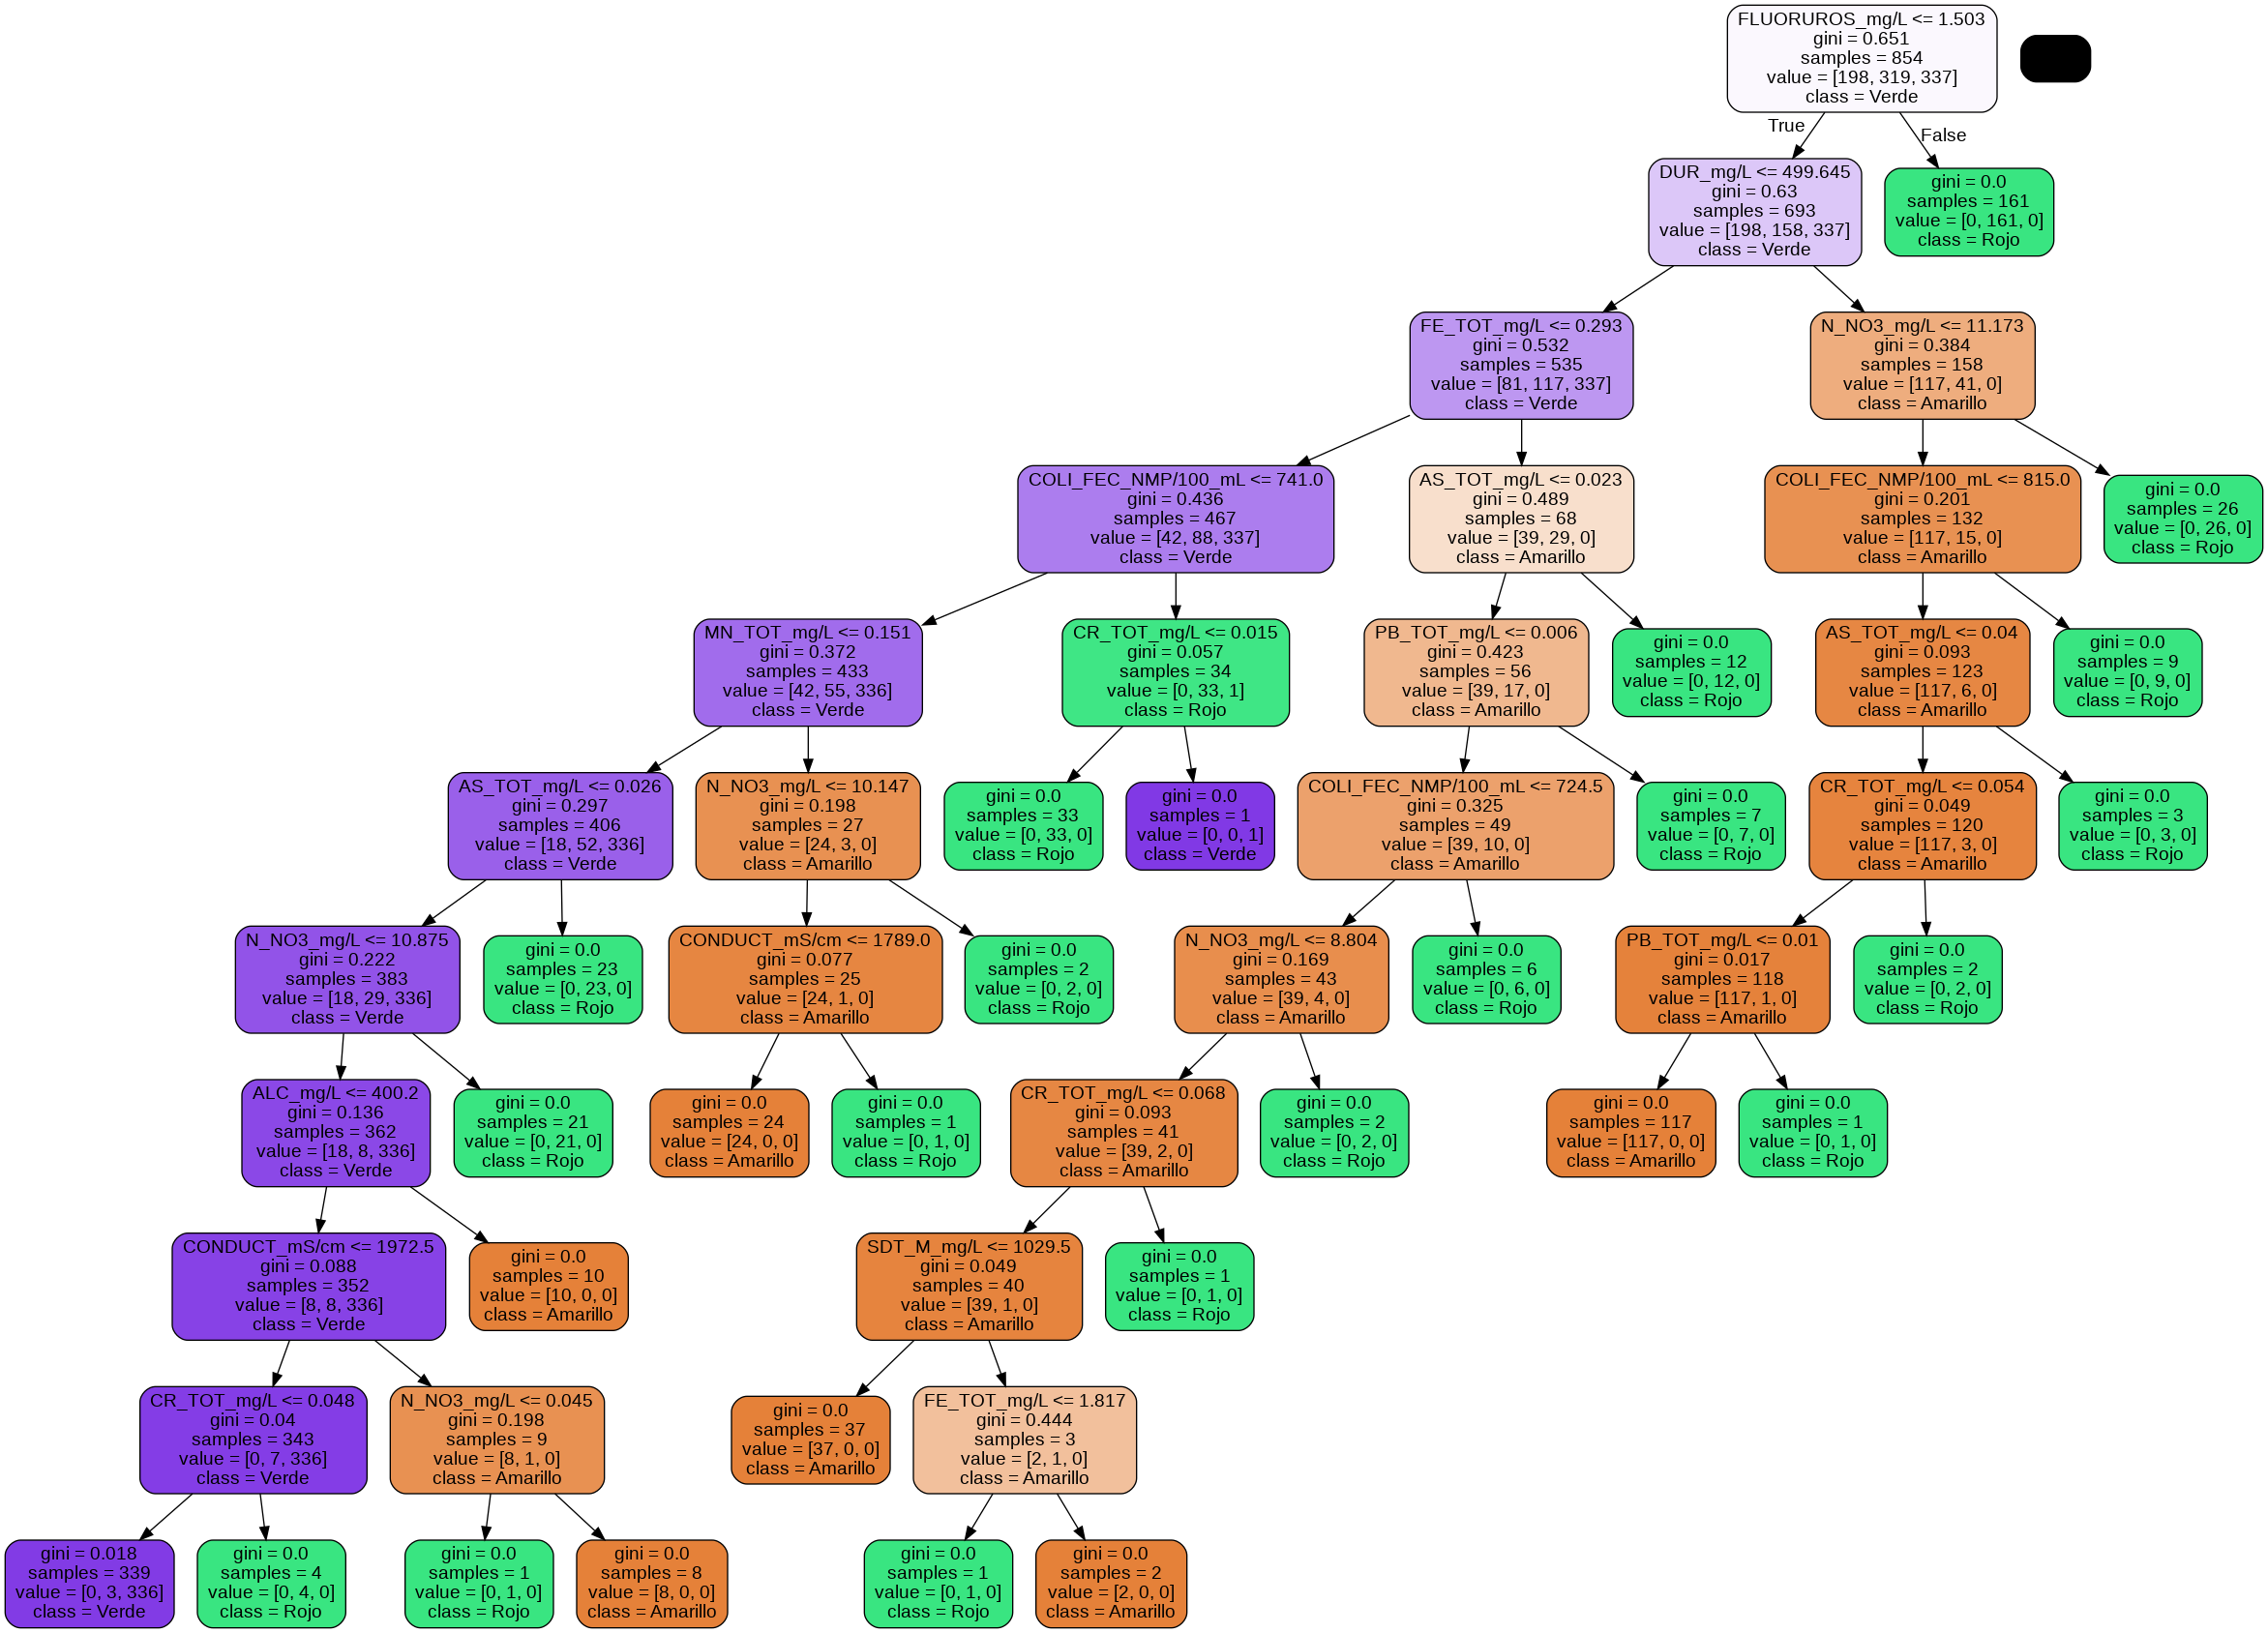

In [135]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

img_DT = export_graphviz(DT,
                         out_file = None,
                         feature_names = X_train.columns,
                         class_names = ['Amarillo', 'Rojo', 'Verde'],
                         rounded = True,
                         filled = True)

graph = pydotplus.graph_from_dot_data(img_DT)
graph.write_png('Y_Semaforo_DT.png')
Image(filename = 'Y_Semaforo_DT.png')

In [136]:
# Rendimiento del modelo entrenado
from sklearn.metrics import accuracy_score

y_pred = DT.predict(X_test)
print("El rendiemiento es: ", round(accuracy_score(y_test,y_pred)*100, 2), " %")

El rendiemiento es:  96.26  %


## 4.- Selecciona las variables de mayor importancia.

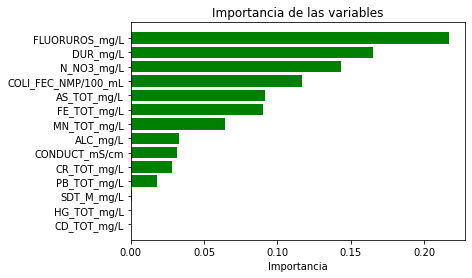

In [137]:
plt.title('Importancia de las variables')
plt.barh(range(len(np.argsort(DT.feature_importances_))), DT.feature_importances_[np.argsort(DT.feature_importances_)], color = 'green')
plt.yticks(range(len(np.argsort(DT.feature_importances_))), [X_test.columns[i] for i in np.argsort(DT.feature_importances_)])
plt.xlabel('Importancia')
plt.show()

Es decir, entre las variables con mayor importancia estan FLUORUROS, DUR, N_NO3, COLI_FEC_NMP, AS_TOT, MN_TOT, ALC, CONDUCT, CR_TOT y PB_TOT

## 5.- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6.- Explora que clasificador es el más optimo, ejemplo: Decision trees y Random Forest.
En el apartado anterior se vio con un arbol de decisión en esta sección veremos que sucede con un modelo de random forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RF = RandomForestClassifier(max_depth = 10, random_state = 80, class_weight = 'balanced')
RF = RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


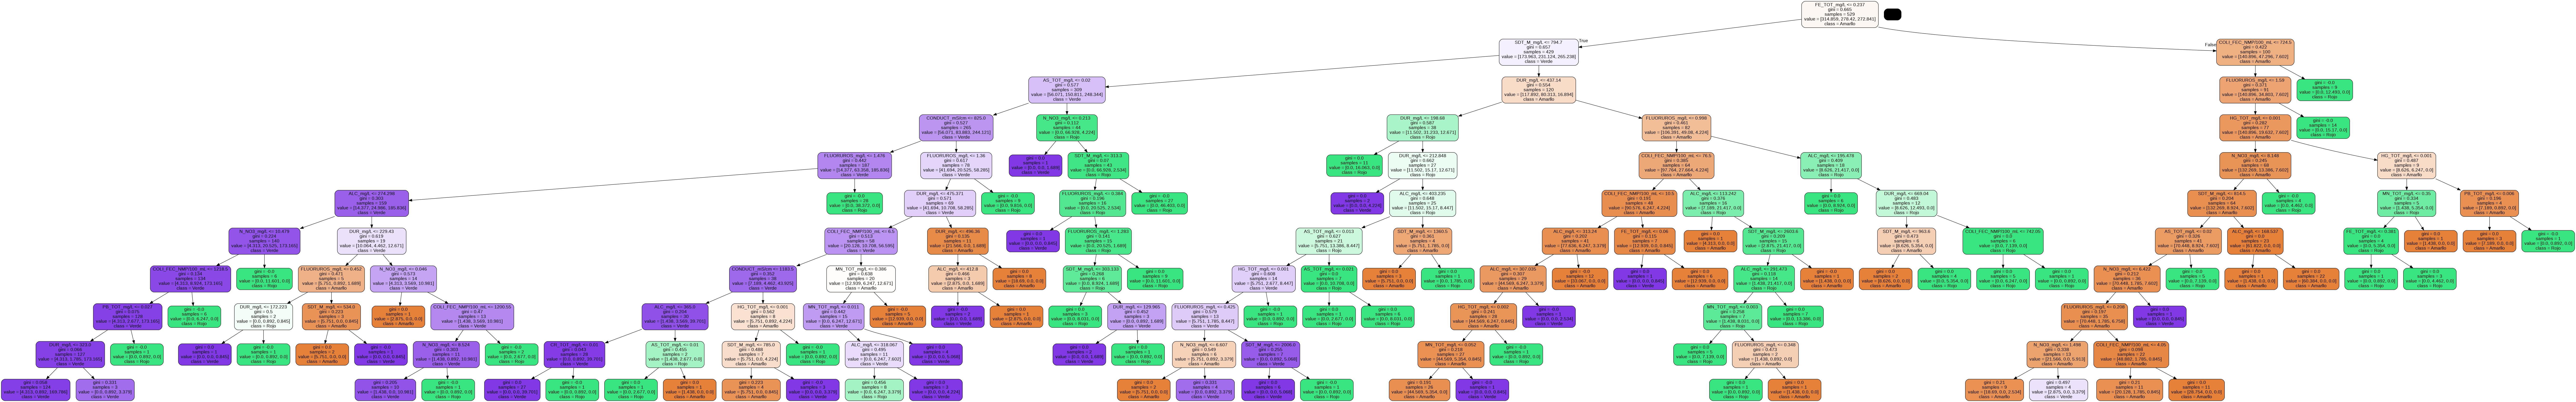

In [140]:
img_RF = export_graphviz(RF[5],
                         out_file = None,
                         feature_names= X_train.columns,
                         class_names = ['Amarllo','Rojo','Verde'],
                         rounded = True,
                         filled = True)

graph = pydotplus.graph_from_dot_data(img_RF)
graph.write_png('Y_Semaforo_RF.png')
Image(filename = 'Y_Semaforo_RF.png')

In [141]:
# Rendimiento del modelo entrenado
y_pred = RF.predict(X_test)
print("El rendiemiento es: ", round(accuracy_score(y_test,y_pred)*100, 2), " %")

El rendiemiento es:  94.86  %


Variables importantes del modelo de Random Forest

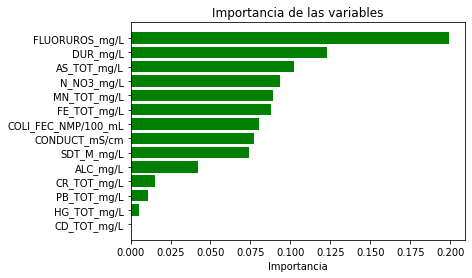

In [142]:
plt.title('Importancia de las variables')
plt.barh(range(len(np.argsort(RF.feature_importances_))), RF.feature_importances_[np.argsort(RF.feature_importances_)], color = 'green')
plt.yticks(range(len(np.argsort(RF.feature_importances_))), [X_test.columns[i] for i in np.argsort(RF.feature_importances_)])
plt.xlabel('Importancia')
plt.show()

Es decir, entre las variables con mayor importancia estan FLUORUROS, DUR, AS_TOT, N_NO3, MN_TOT, FE_TOT, COLI_FEC_NMP, CONDUCT, SDT_M, ALC, CR_TOT, PB_TOT y HG_TOT

## 7.- Determina el grado de exactitud a través del reporte de clasificación

In [143]:
# Arbol de Decisión
y_pred = DT.predict(X_test)
print("El desempeño del modelo de árbol de decisión medido con el accuary es: ", round(accuracy_score(y_test,y_pred)*100, 2), " %")

# Random Forest
y_pred = RF.predict(X_test)
print("El desempeño del modelo del random forest medido con el accuary es: ", round(accuracy_score(y_test,y_pred)*100, 2), " %")

El desempeño del modelo de árbol de decisión medido con el accuary es:  96.26  %
El desempeño del modelo del random forest medido con el accuary es:  94.86  %


Se observa según el accuary que el árbol de decisión tiene un mejor comportamiento que el modelo de random forest.

## 8.- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión

In [144]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(['[0,0]','[0,1]','[0,2]',
                                                       '[1,0]','[1,1]','[1,2]',
                                                       '[2,0]','[2,1]','[2,2]',],frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(3,3)

  plt.figure(figsize = (6,4))
  ax = sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Pastel1', cbar = False)
  ax.set(ylabel = "Etiquetas Reales", xlabel = "Etiquetas de Predicción")
  plt.show()

def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  return(round((cm[1,1]/(cm[1,0]+cm[1,1])*100), 2))

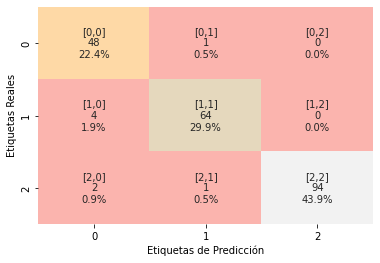

Valor del recall: 94.1200


In [145]:
mi_cm(y_test, DT.predict(X_test))
print("Valor del recall: %.4f" % mi_recall(y_test, DT.predict(X_test)))

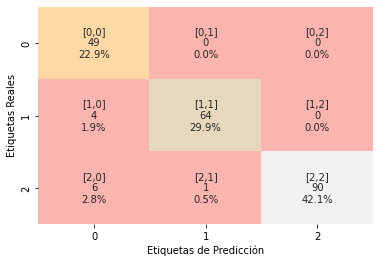

Valor del recall: 94.1200


In [146]:
mi_cm(y_test, RF.predict(X_test))
print("Valor del recall: %.4f" % mi_recall(y_test, RF.predict(X_test)))